## Importar librerias

In [21]:
import librosa
import numpy as np
import sounddevice as sd
import wavio
import matplotlib.pyplot as plt

## Grabar audio

In [10]:
# Dispositivos disponibles
dispositivos_disponibles = sd.query_devices()

print("Dispositivos disponibles:")
for i, dispositivo in enumerate(dispositivos_disponibles):
    if dispositivo['max_output_channels'] == 0:
        print(f"{i}. {dispositivo['name']}")

Dispositivos disponibles:
0. Asignador de sonido Microsoft - Input
1. Auriculares con micrófono (Raze
2. Micrófono nativo pc (Realtek(R)
6. Controlador primario de captura de sonido
7. Auriculares con micrófono (Razer Kaira Pro)
8. Micrófono nativo pc (Realtek(R) Audio)
14. Micrófono nativo pc (Realtek(R) Audio)
15. Auriculares con micrófono (Razer Kaira Pro)
17. Auriculares con micrófono (@System32\drivers\bthhfenum.sys,#2;%1 Hands-Free%0
;(Galaxy Buds (BB80)))
18. Mic in at front panel (black) (Mic in at front panel (black))
21. Altavoz de PC (Realtek HD Audio output with HAP)
22. Mezcla estéreo (Realtek HD Audio Stereo input)
23. Varios micrófonos (Realtek HD Audio Mic input)
26. Altavoz de PC (Realtek HD Audio 2nd output with HAP)
28. Auriculares con micrófono (@System32\drivers\bthhfenum.sys,#2;%1 Hands-Free%0
;(Razer Kaira Pro))


In [11]:
def grabar_audio(nombre_archivo, duracion_segundos, dispositivo, fs):
    print('Grabación iniciada')
    grabacion = sd.rec(int(duracion_segundos * fs), samplerate=fs, channels=1)
    sd.wait()
    print('Grabación terminada')

    # Guarda la grabación como "audio.wav"
    wavio.write(nombre_archivo, grabacion, fs, sampwidth=2)

    print(f"Grabación guardada como: {nombre_archivo}")


In [12]:
#dispositivo_seleccionado = int(input("Selecciona el número del dispositivo de entrada: ")) - 1
dispositivo_seleccionado = 7
frecuencia_muestreo = 22050 #Audio de alta calidad
duracion_grabacion = 5
nombre_archivo = 'audio.wav'

print(f"Dispositivo sleccionado: {dispositivos_disponibles[dispositivo_seleccionado]['name']}")

#2. Micrófono nativo pc (Realtek(R)
#7. Auriculares con micrófono (Razer Kaira Pro)

audio = grabar_audio(nombre_archivo,duracion_grabacion, dispositivo_seleccionado,frecuencia_muestreo)

Dispositivo sleccionado: Auriculares con micrófono (Razer Kaira Pro)
Grabación iniciada


Grabación terminada
Grabación guardada como: audio.wav


## Cargar el audio en el formato que librosa lo requiere

In [13]:
y, sr = librosa.load(nombre_archivo, sr = frecuencia_muestreo, mono=True, duration=duracion_grabacion)

## Limpiamos el audio de ruido

In [14]:
# Formula preemphasis y[n] -> y[n] - coef * y[n-1]
def preprocessing( audio ):
    filter_audio = librosa.effects.preemphasis( audio )

    return filter_audio

In [15]:
audio_filtrado = preprocessing(y)

## Graficamos el audio original y el audio filtrado

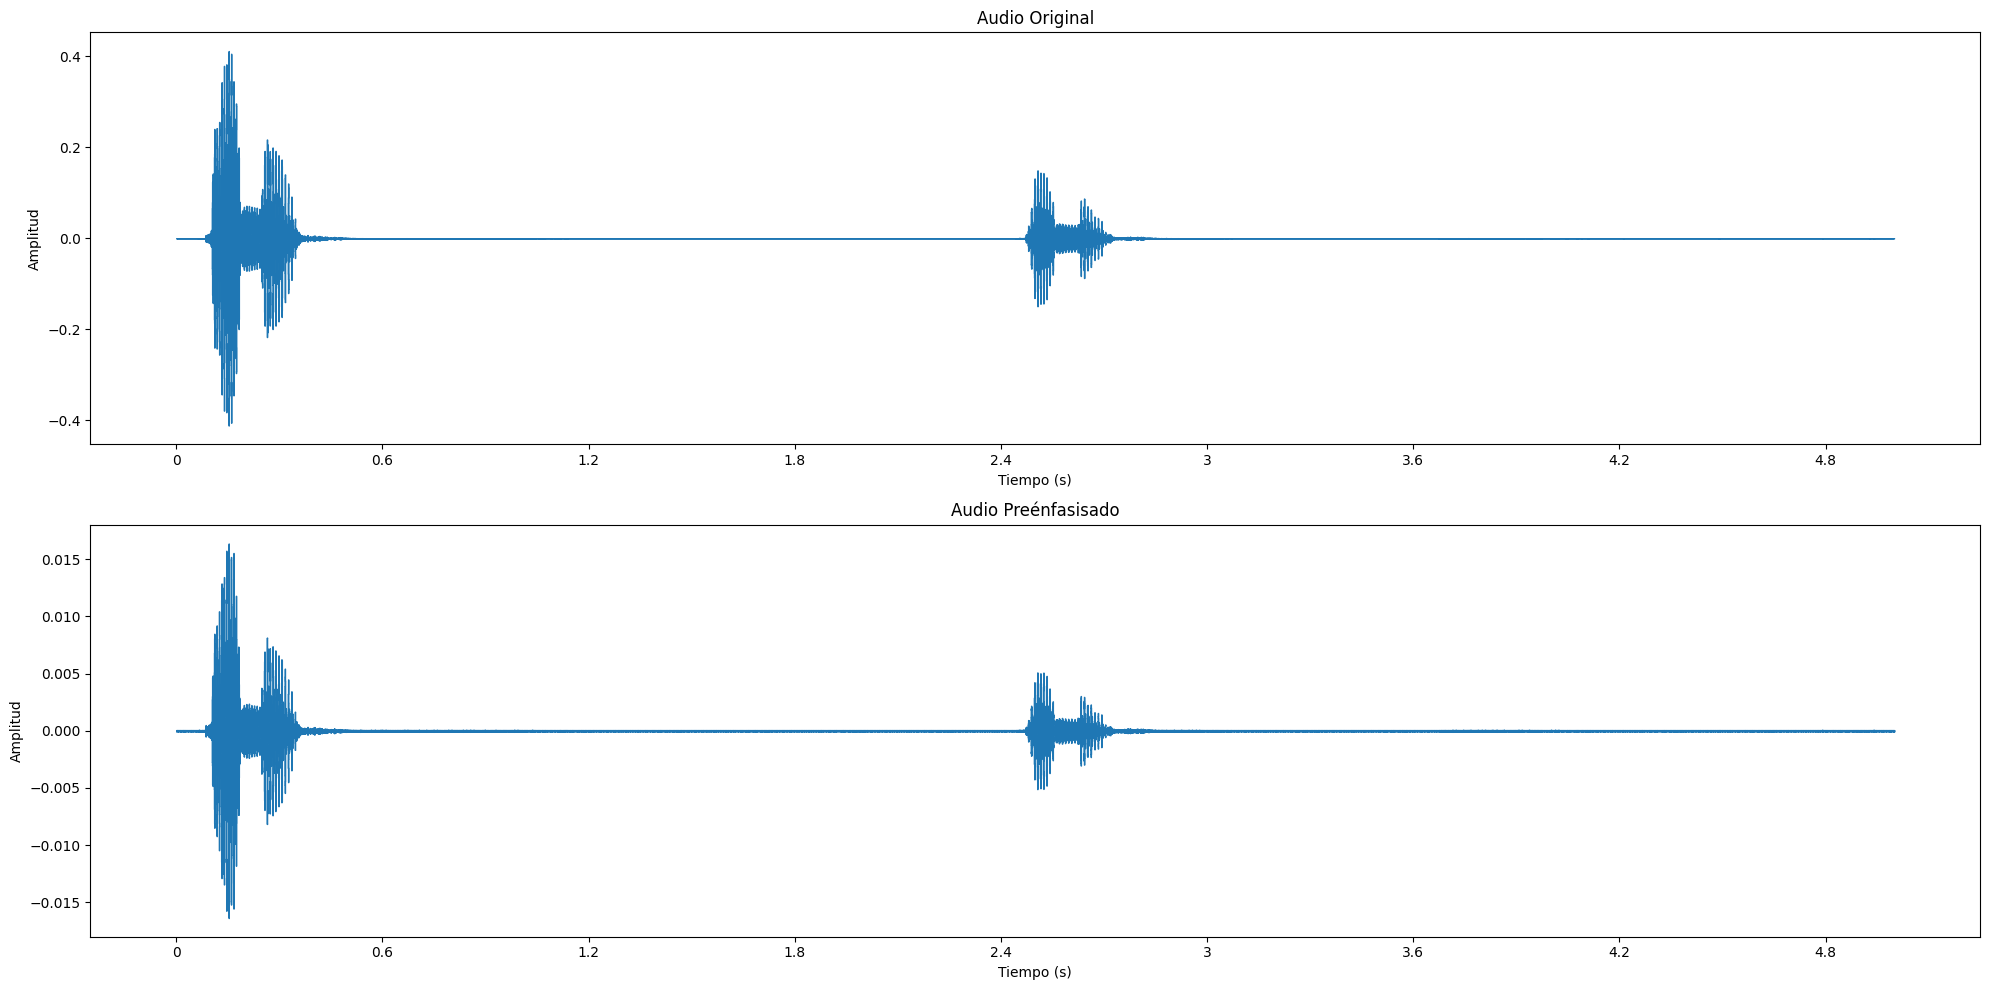

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

# Grafica el audio original
librosa.display.waveshow(y, sr=frecuencia_muestreo, ax=axs[0])
axs[0].set(title='Audio Original', xlabel='Tiempo (s)', ylabel='Amplitud')

# Grafica el audio preénfasisado
librosa.display.waveshow(audio_filtrado, sr=frecuencia_muestreo, ax=axs[1])
axs[1].set(title='Audio Preénfasisado', xlabel='Tiempo (s)', ylabel='Amplitud')

plt.tight_layout()
plt.show()

## Caulamos los MFCCs y  espectrograma

In [20]:
#Calculo de MFCCs
mfccs = librosa.feature.mfcc(y = audio_filtrado, sr = frecuencia_muestreo, n_mfcc=13)

#Calculo de Espectrograma
espectograma = librosa.feature.melspectrogram(y = audio_filtrado, sr = frecuencia_muestreo)

c:\Users\lawli\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


## Mostrar los MFCCs

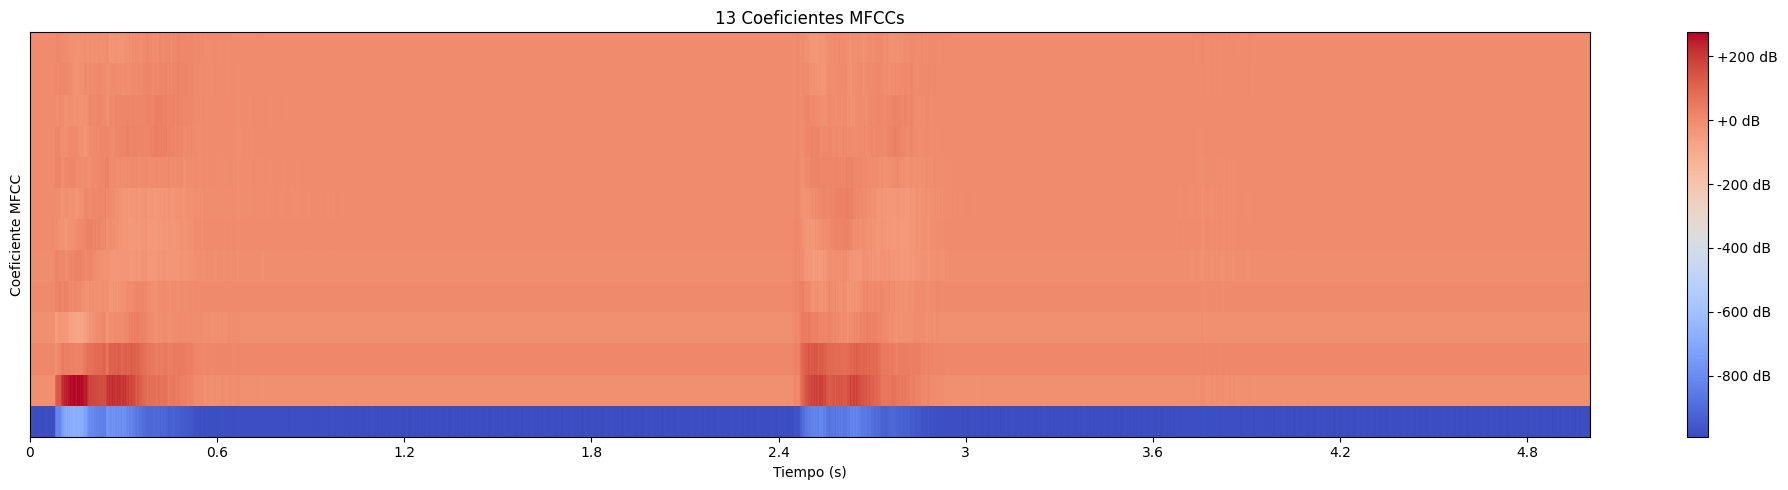

In [19]:
# Graficar los coeficientes MFCC
plt.figure(figsize=(20, 5))
librosa.display.specshow(mfccs, x_axis='time', sr=frecuencia_muestreo)
plt.colorbar(format='%+2.0f dB')
plt.title('13 Coeficientes MFCCs')
plt.xlabel('Tiempo (s)')
plt.ylabel('Coeficiente MFCC')
plt.tight_layout()
plt.show()

## Mostrar el espectograma

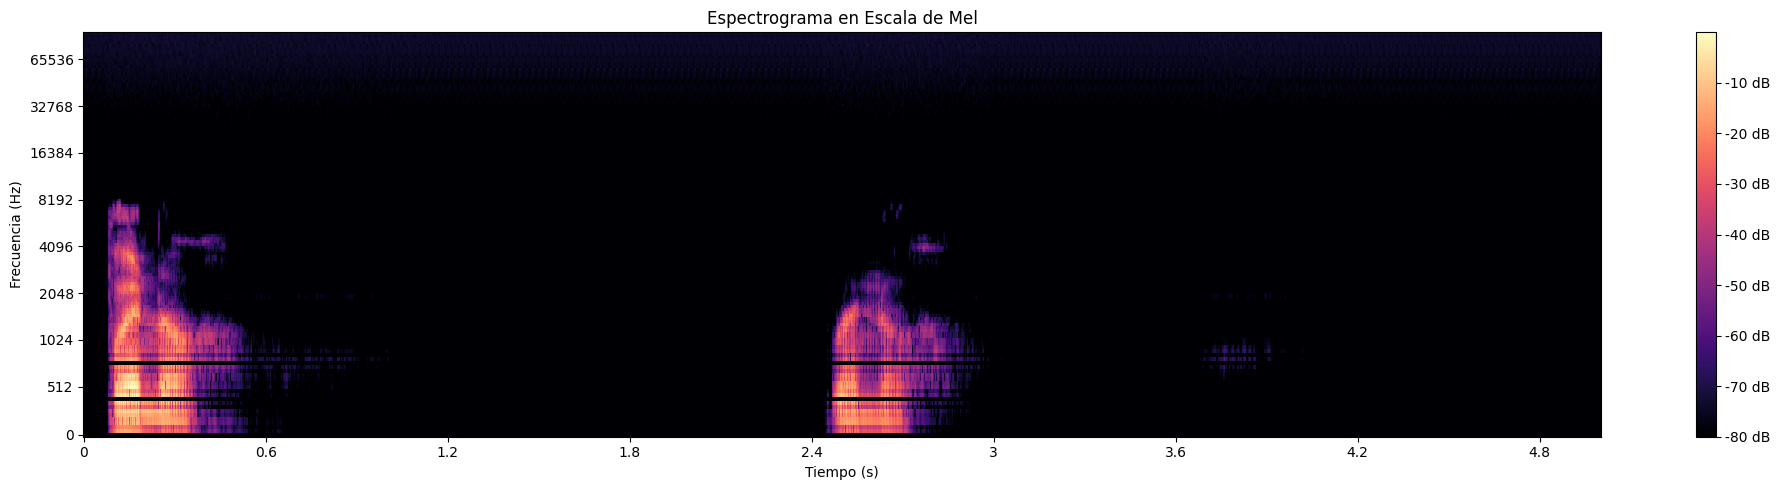

In [23]:
# Convierte a decibelios
S_dB = librosa.power_to_db(espectograma, ref=np.max)

# Grafica el espectrograma
plt.figure(figsize=(20, 5))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=frecuencia_muestreo, fmax=frecuencia_muestreo//2)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma en Escala de Mel')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.tight_layout()
plt.show()

## IA de validación biométrica